# Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from data_treatment import DataAtts
from scipy.stats import norm
import ipywidgets as widgets
import matplotlib.pyplot as plt
import glob
from IPython.display import display

In [2]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='File:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)

Dropdown(description='File:', index=3, options=('original_data/creditcard_1s_escalonated.csv', 'original_data/…

In [3]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)
    
    
data = pd.read_csv(file_name)
print(dataAtts.message, "\n")
print(dataAtts.values_names[0], round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print(dataAtts.values_names[1], round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100,2), '%  of the dataset')

Credit Card Fraud Detection eSCALONATED 

No Frauds 99.83 %  of the dataset
Frauds 0.17 %  of the dataset


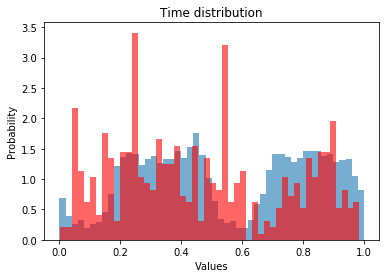

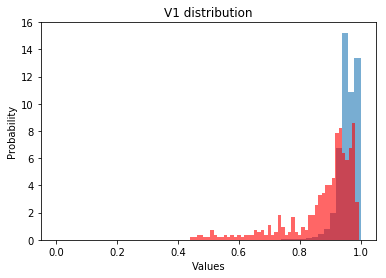

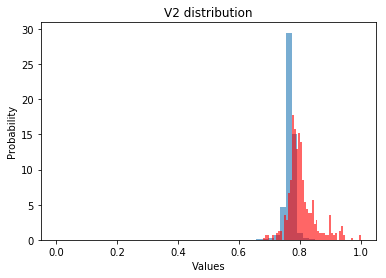

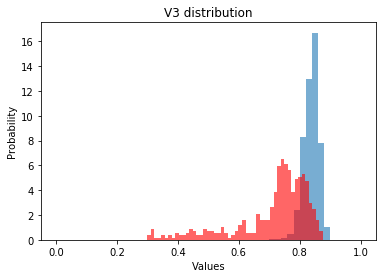

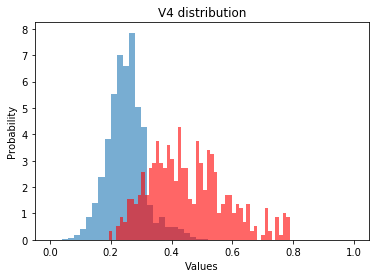

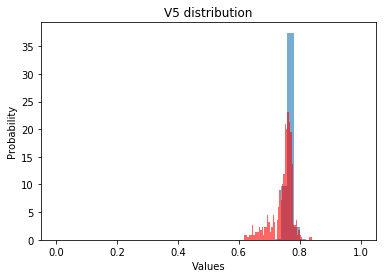

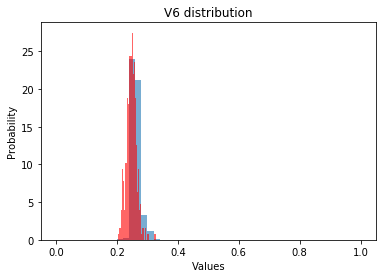

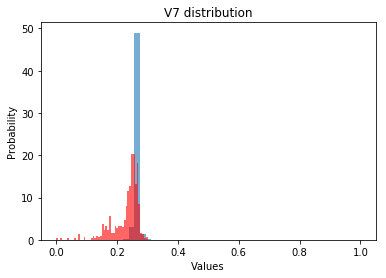

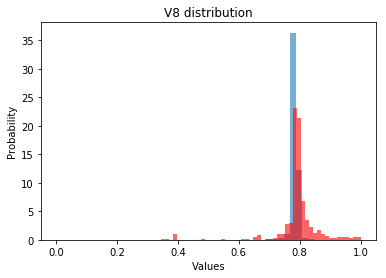

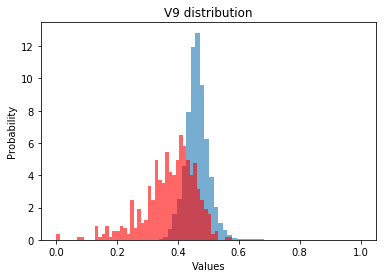

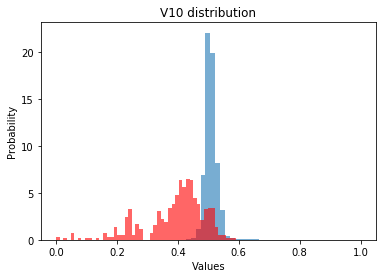

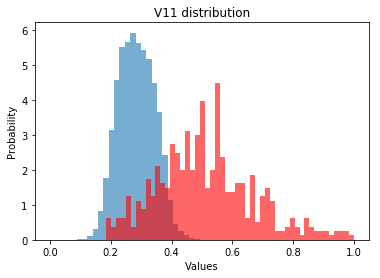

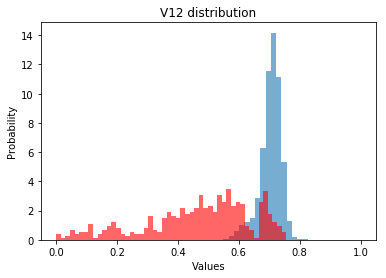

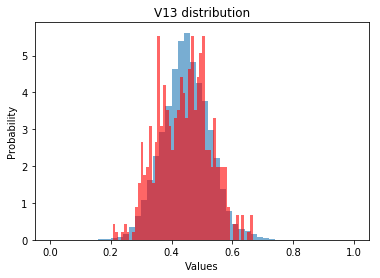

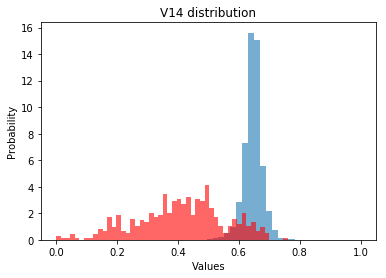

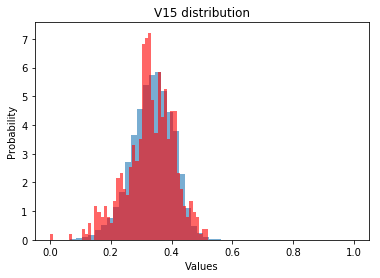

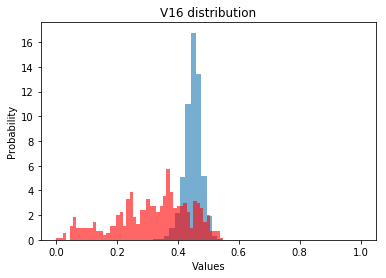

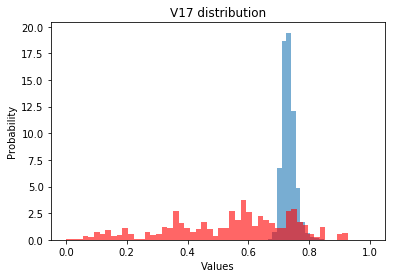

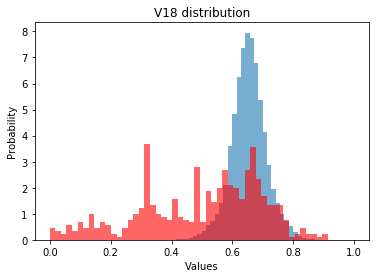

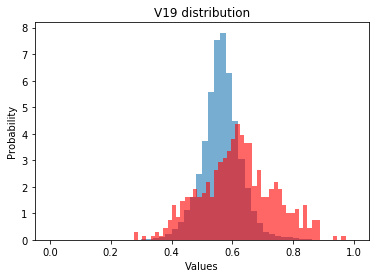

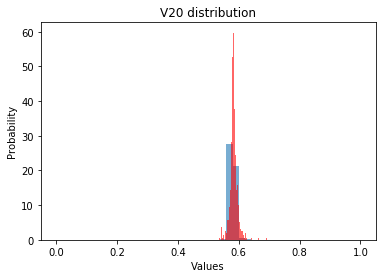

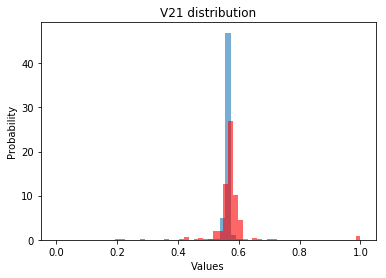

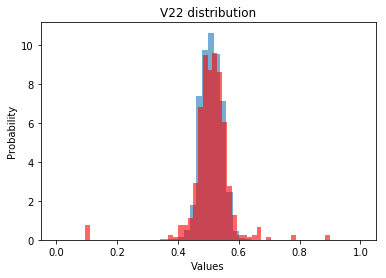

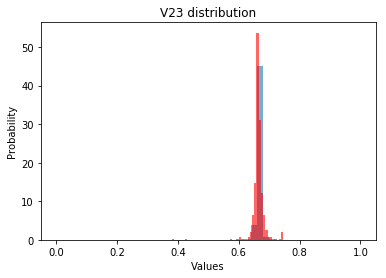

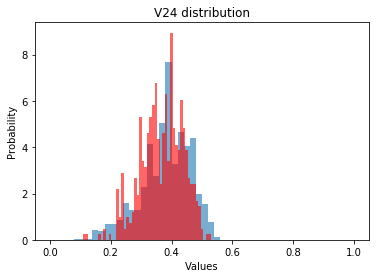

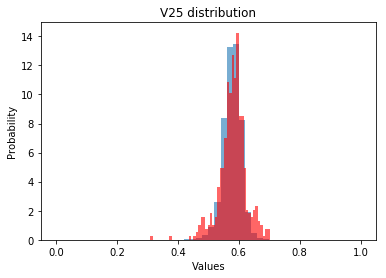

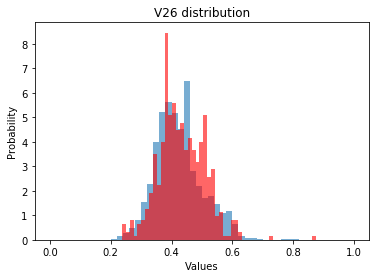

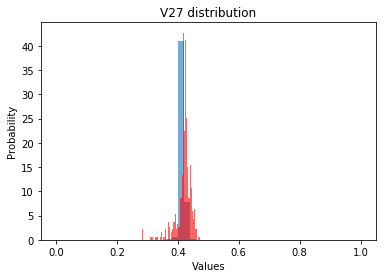

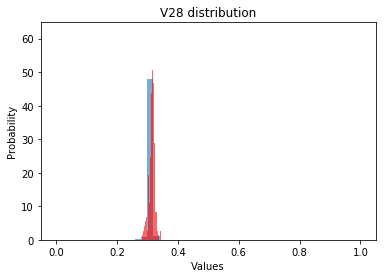

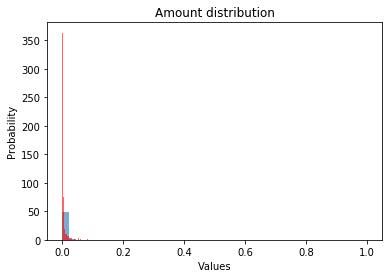

<Figure size 432x288 with 0 Axes>

In [4]:
classes = list(data)
file = open("values_analysis/" + dataAtts.fname + "_analysis.txt", "w")

file.write(dataAtts.message +  "\n\n")
file.write(dataAtts.values_names[0] + ": " + str(round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100, 2)) +  '%  of the dataset' + "\n")
file.write(dataAtts.values_names[1] + ": " +   str(round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100, 2)) +  '%  of the dataset' + "\n\n")

for name in classes:
    if name==dataAtts.class_name or name=="Unnamed: 32":
        continue
        
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title(name + " distribution")
    fraud_dist = data[name].loc[data[dataAtts.class_name] == 1].values
    common_dist = data[name].loc[data[dataAtts.class_name] == 0].values
    plt.hist(common_dist, 50, density=True, alpha=0.6)
    plt.hist(fraud_dist, 50, density=True, alpha=0.6, facecolor='r')
    plt.savefig('images/'+ dataAtts.fname + "/"+name+'_distribution.png')
    plt.show()
    plt.clf()

    file.write(name + ":\n")
    file.write("\t\t\t" + dataAtts.values_names[0] + "\t\t\t\t\t"+dataAtts.values_names[1]+"\n")
    file.write("min:\t\t" + str(round(common_dist.min(), 3)) + "\t\t\t\t\t" + str(round(fraud_dist.min(), 3))+"\n")
    file.write("max:\t\t" + str(round(common_dist.max(), 3)) + "\t\t\t\t\t" + str(round(fraud_dist.max(), 3))+"\n")
    file.write("mean:\t\t" + str(round(common_dist.mean(), 3)) + "\t\t\t\t\t" + str(round(fraud_dist.mean(), 3))+"\n")
    file.write("median:\t\t" + str(round(np.median(common_dist), 3)) + "\t\t\t\t\t" + str(round(np.median(fraud_dist), 3))+"\n\n")